In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import warnings; warnings.simplefilter('ignore')
import sys
sys.path.insert(0, '/Users/jsmonzon/Research/SatGen/mcmc/src/')
import jsm_halopull
import jsm_SHMR
import jsm_mcmc
import jsm_stats
import jsm_models

In [3]:
plt.style.use('bmh')
plt.rcParams['axes.facecolor'] = 'white'
plt.rcParams['axes.grid'] = False
plt.rcParams['xtick.labelsize'] = 10
plt.rcParams['ytick.labelsize'] = 10
plt.rcParams['axes.labelsize'] = 15
plt.rc('legend',fontsize=15) # using a size in points
import pygtc


In [4]:
plabels = ["$M_{*}$", "$\\alpha$", "$\\sigma$"," $\\gamma$", "$\\beta$", "$\\tau$"]

priors = [[9.5,11.5], [-1,7], [0,5], [-2,2], [-3,2], [-2,2]]

fixed = [False, True, True, False, False, False]

### first the alpha permutations

In [5]:
alpha0 = jsm_mcmc.Chain("../../mcmc/Feature_Recovery/alpha_permutations/mock_1/chain.h5", fixed=fixed, Nstack=500, Nburn=100, Nthin=15)

alpha1 = jsm_mcmc.Chain("../../../data/remote_pull/Danieli-stats/model_1/chain.h5", fixed=fixed, Nstack=500, Nburn=100, Nthin=15)

alpha2 = jsm_mcmc.Chain("../../../data/remote_pull/Danieli-stats/model_2/chain.h5", fixed=fixed, Nstack=500, Nburn=100, Nthin=15)

alpha3 = jsm_mcmc.Chain("../../../data/remote_pull/Danieli-stats/model_3/chain.h5", fixed=fixed, Nstack=500, Nburn=100, Nthin=15)

alpha4 = jsm_mcmc.Chain("../../../data/remote_pull/Danieli-stats/model_4/chain.h5", fixed=fixed, Nstack=500, Nburn=100, Nthin=15)

In [6]:
chain_labels = ["Nhost = 10k \n $\\alpha = $" + alpha1.constraints[0] + "\n $\\sigma = $" + alpha1.constraints[1],
                "Nhost = 1K \n $\\alpha = $" + alpha2.constraints[0] + "\n $\\sigma = $" + alpha2.constraints[1],
                "Nhost = 500 \n $\\alpha = $" + alpha3.constraints[0] + "\n $\\sigma = $" + alpha3.constraints[1],
                "Nhost = 300 \n $\\alpha = $" + alpha4.constraints[0] + "\n $\\sigma = $" + alpha4.constraints[1]]

In [7]:
data = [alpha1.clean, alpha2.clean, alpha3.clean, alpha4.clean]

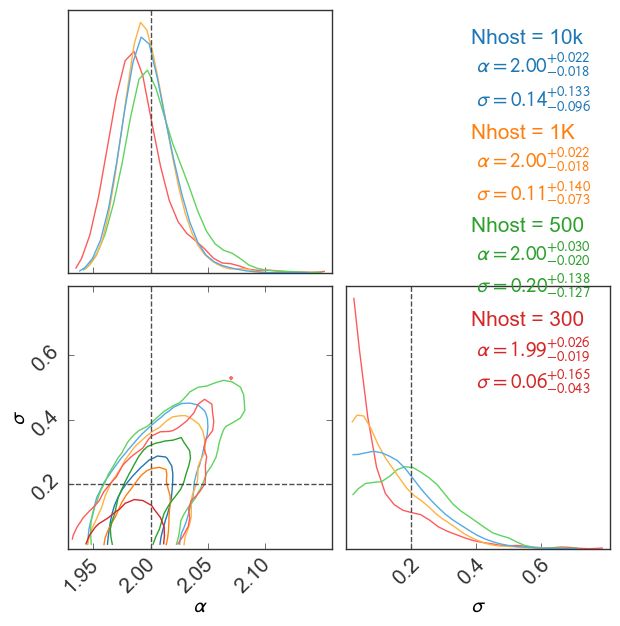

In [8]:
test = jsm_mcmc.MulitChain(data, chain_labels, fixed)
test.plot_posteriors(truths=[2.0, 0.2], filledPlots=False, nContourLevels=2)

In [9]:
np.load("../../../data/MW-analog/meta_data_psi3/Danieli-stats/model_4/models.npz")["mass"].shape[0]

3